In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libaries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Libraries imported (for data prep)
import datetime

# Libraries imported (for random forest)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# Libraries imported (for accuracy metrics)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
path = "/content/drive/MyDrive/DSAI Mini Project (Self)/Tetuan City power.csv"
# data = pd.read_csv(path, parse_dates=['DateTime'], index_col=['DateTime'])
data = pd.read_csv(path, parse_dates=[0])
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.dtypes

DateTime                     datetime64[ns]
Temperature                         float64
Humidity                            float64
Wind Speed                          float64
general diffuse flows               float64
diffuse flows                       float64
Zone 1 Power Consumption            float64
Zone 2  Power Consumption           float64
Zone 3  Power Consumption           float64
dtype: object

In [ ]:
null_values = pd.DataFrame(data.isnull().sum(), columns = ["Sum of Missing Values"], index = data.columns)
null_values

,Sum of Missing Values
DateTime,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Zone 1 Power Consumption,0
Zone 2 Power Consumption,0
Zone 3 Power Consumption,0


<ipython-input-76-35b1c3f970d3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths=.5, ax = ax, cmap = "rocket")


<Axes: >

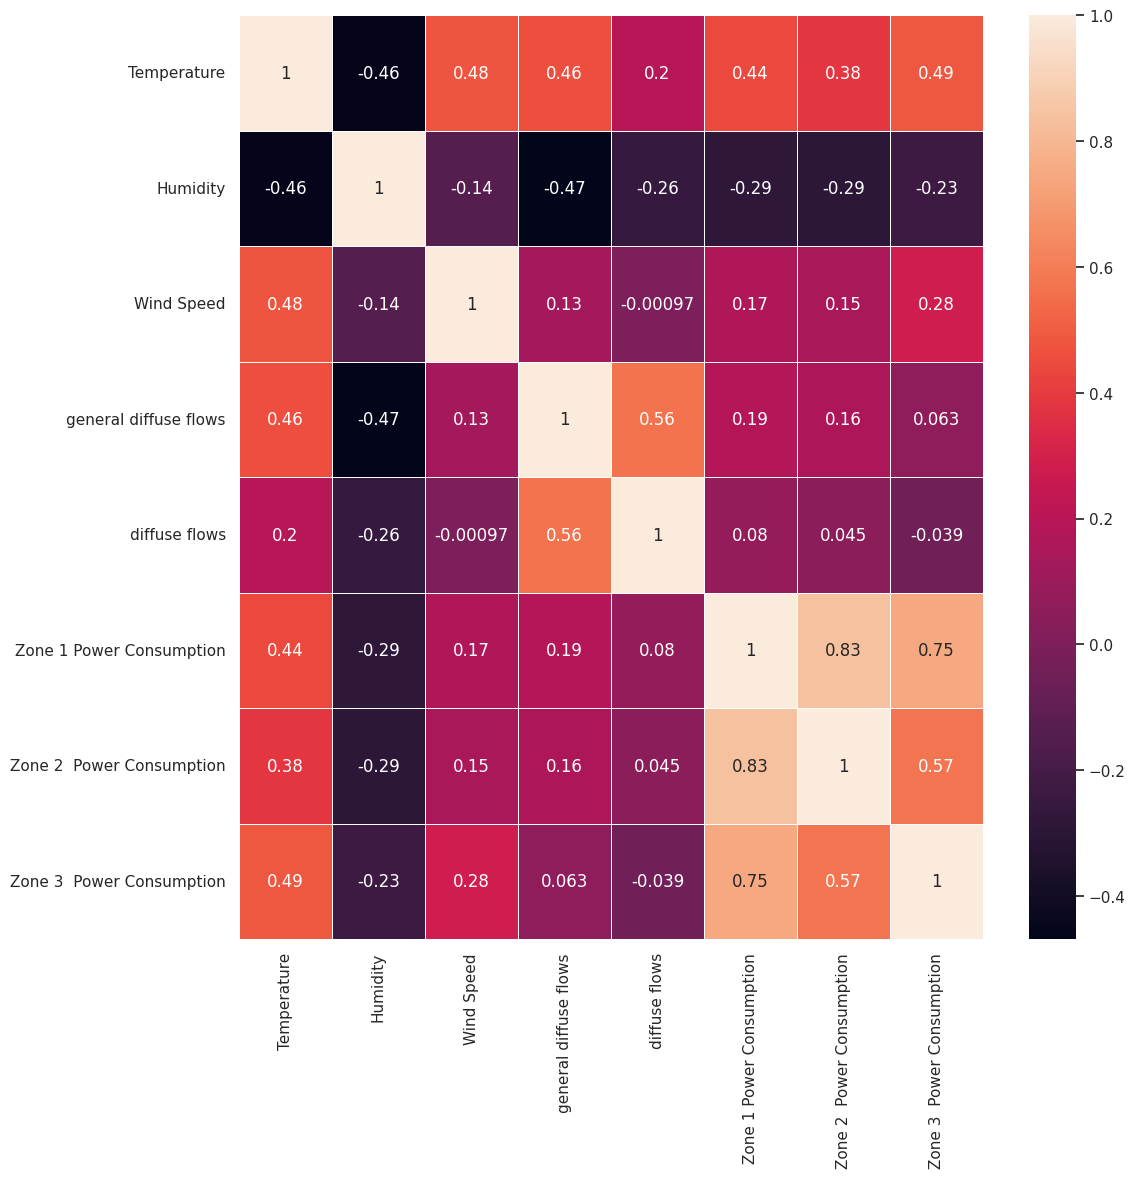

In [ ]:
# checking correlation for original features
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(data.corr(), annot = True, linewidths=.5, ax = ax, cmap = "rocket")

In [ ]:
# create new feature "Total Power Consumption"
data['Total Power Consumption'] = data['Zone 1 Power Consumption'] + data['Zone 2  Power Consumption'] + data['Zone 3  Power Consumption']
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627


In [ ]:
visualise_data = pd.Series(data = data['Total Power Consumption'].values, index = data['DateTime'].values)
visualise_data

2017-01-01 00:00:00    70425.53544
2017-01-01 00:10:00    69320.84387
2017-01-01 00:20:00    67803.22193
2017-01-01 00:30:00    65489.23209
2017-01-01 00:40:00    63650.44627
                          ...     
2017-12-30 23:10:00    72798.08659
2017-12-30 23:20:00    70983.80786
2017-12-30 23:30:00    68675.04965
2017-12-30 23:40:00    67163.01682
2017-12-30 23:50:00    65750.53976
Length: 52416, dtype: float64

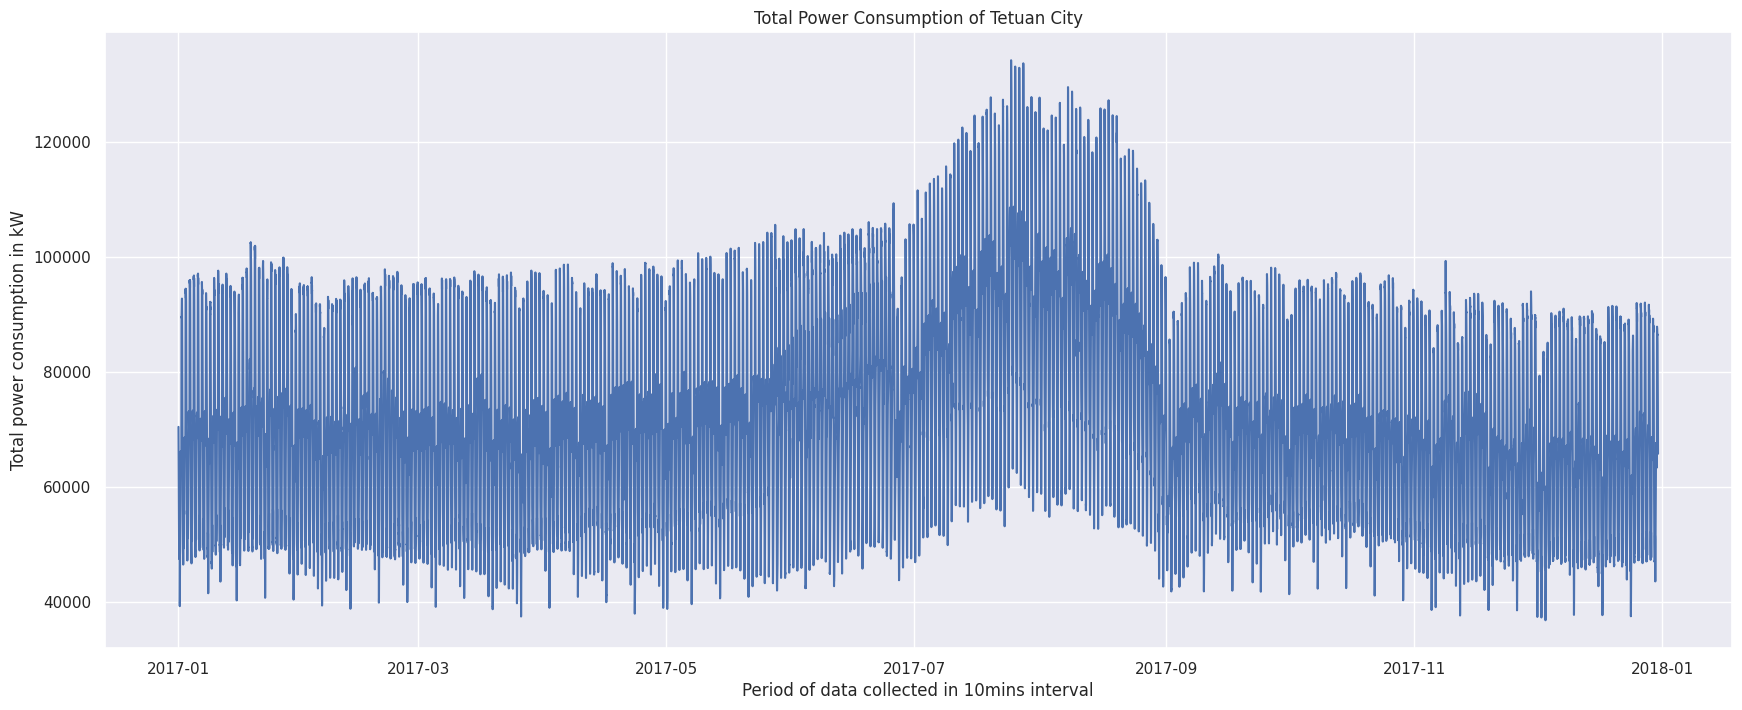

In [ ]:
# visualisation of total power consumed throughout the entire period of data collected
plt.figure(figsize=(21, 8))
plt.plot(visualise_data['2017-01-01 00:00:00':'2017-12-30 23:50:00'])
plt.title('Total Power Consumption of Tetuan City')
plt.ylabel('Total power consumption in kW')
plt.xlabel('Period of data collected in 10mins interval')
plt.show()

In [ ]:
def create_features(df):
    df['Day'] = df['DateTime'].dt.day
    df['Month'] = df['DateTime'].dt.month
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute
    df['Quarter'] = df['DateTime'].dt.quarter
    df['Year'] = df['DateTime'].dt.year

    # df['weekofyear'] = df['DateTime'].dt.isocalendar().week
    return df

data = create_features(data)
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total Power Consumption,Day,Month,Hour,Minute,Quarter,Year
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,1,1,0,0,1,2017
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,1,1,0,10,1,2017
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,1,1,0,20,1,2017
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,1,1,0,30,1,2017
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,1,1,0,40,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,72798.08659,30,12,23,10,4,2017
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,70983.80786,30,12,23,20,4,2017
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,68675.04965,30,12,23,30,4,2017
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,67163.01682,30,12,23,40,4,2017


In [ ]:
# keep datetime feature to select the days later on, the features below can be dropped as they are not needed anymore
cleaned_data = data.drop(['Temperature',	'Humidity',	'Wind Speed',	'general diffuse flows', 'diffuse flows',
                  "Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"], axis = 1)


In [ ]:
cleaned_data

,DateTime,Total Power Consumption,Day,Month,Hour,Minute,Quarter,Year
0,2017-01-01 00:00:00,70425.53544,1,1,0,0,1,2017
1,2017-01-01 00:10:00,69320.84387,1,1,0,10,1,2017
2,2017-01-01 00:20:00,67803.22193,1,1,0,20,1,2017
3,2017-01-01 00:30:00,65489.23209,1,1,0,30,1,2017
4,2017-01-01 00:40:00,63650.44627,1,1,0,40,1,2017
...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,72798.08659,30,12,23,10,4,2017
52412,2017-12-30 23:20:00,70983.80786,30,12,23,20,4,2017
52413,2017-12-30 23:30:00,68675.04965,30,12,23,30,4,2017
52414,2017-12-30 23:40:00,67163.01682,30,12,23,40,4,2017


In [ ]:
# selecting the last 15 days for model comparison
start_date = '2017-12-16 00:00:00'
end_date = '2017-12-30 23:50:00'
mask = (cleaned_data['DateTime'] >= start_date) & (cleaned_data['DateTime'] <= end_date)
last_15_days = cleaned_data.loc[mask]
last_15_days

,DateTime,Total Power Consumption,Day,Month,Hour,Minute,Quarter,Year
50256,2017-12-16 00:00:00,61346.07666,16,12,0,0,4,2017
50257,2017-12-16 00:10:00,59841.73153,16,12,0,10,4,2017
50258,2017-12-16 00:20:00,58469.28636,16,12,0,20,4,2017
50259,2017-12-16 00:30:00,57239.78104,16,12,0,30,4,2017
50260,2017-12-16 00:40:00,56161.60690,16,12,0,40,4,2017
...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,72798.08659,30,12,23,10,4,2017
52412,2017-12-30 23:20:00,70983.80786,30,12,23,20,4,2017
52413,2017-12-30 23:30:00,68675.04965,30,12,23,30,4,2017
52414,2017-12-30 23:40:00,67163.01682,30,12,23,40,4,2017


In [ ]:
data_train, data_test =np.split(last_15_days, [int(0.7 *len(last_15_days))])
X_train = data_train[['Day', 'Month', 'Hour', 'Minute', 'Quarter']]
y_train = data_train[['Total Power Consumption']]
X_test = data_test[['Day', 'Month', 'Hour', 'Minute', 'Quarter']]
y_test = data_test[['Total Power Consumption']]

In [ ]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)

<ipython-input-85-0a58dafa7043>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rfr.predict(X_test)
rfr_df = pd.DataFrame({'Actual': y_test['Total Power Consumption'], 'Prediction': y_pred})
rfr_df.reset_index(drop = True)

,Actual,Prediction
0,68619.355085,68957.262673
1,69654.302581,68950.578536
2,70247.423480,69104.074161
3,70852.390870,69296.004102
4,70748.015480,69471.435719
...,...,...
643,72798.086590,69742.795746
644,70983.807860,68183.724905
645,68675.049650,66342.903367
646,67163.016820,64539.575707


In [ ]:
data_test['Prediction'] = y_pred
visualise_data = pd.concat([data_train, data_test], sort = False)

In [ ]:
visualise_data

,DateTime,Total Power Consumption,Day,Month,Hour,Minute,Quarter,Year,Prediction
50256,2017-12-16 00:00:00,61346.07666,16,12,0,0,4,2017,NaN
50257,2017-12-16 00:10:00,59841.73153,16,12,0,10,4,2017,NaN
50258,2017-12-16 00:20:00,58469.28636,16,12,0,20,4,2017,NaN
50259,2017-12-16 00:30:00,57239.78104,16,12,0,30,4,2017,NaN
50260,2017-12-16 00:40:00,56161.60690,16,12,0,40,4,2017,NaN
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,72798.08659,30,12,23,10,4,2017,69742.795746
52412,2017-12-30 23:20:00,70983.80786,30,12,23,20,4,2017,68183.724905
52413,2017-12-30 23:30:00,68675.04965,30,12,23,30,4,2017,66342.903367
52414,2017-12-30 23:40:00,67163.01682,30,12,23,40,4,2017,64539.575707


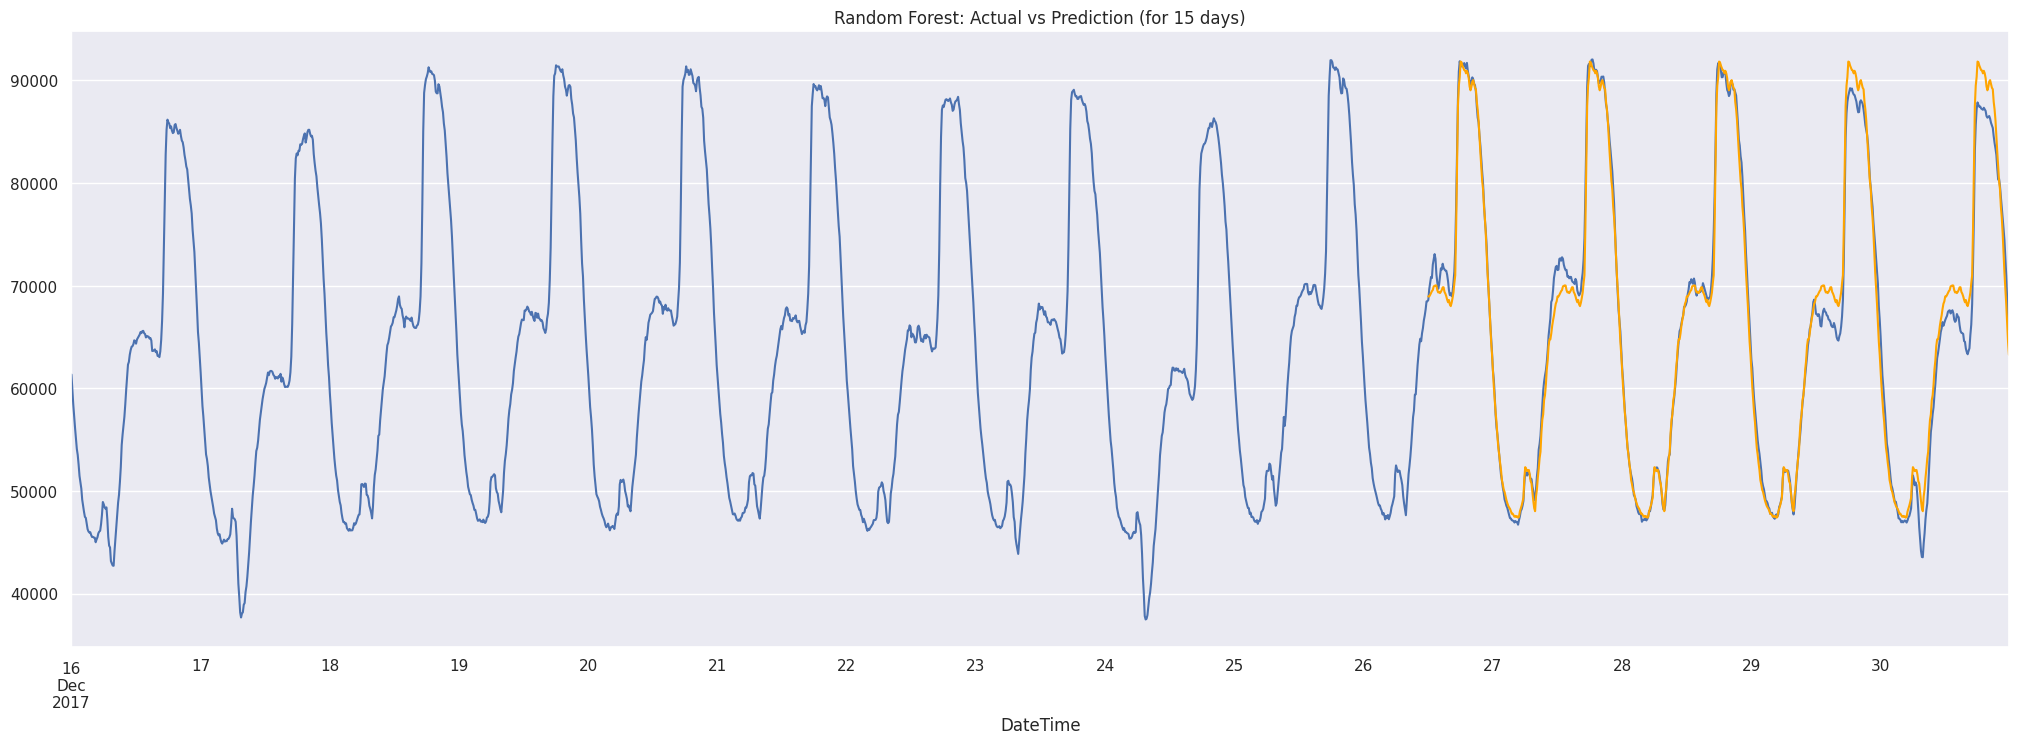

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
visualise_data.plot(x='DateTime', y='Total Power Consumption', ax=ax)
visualise_data.plot(x='DateTime', y='Prediction', ax=ax, color = 'orange')

# ax.set_xlabel('DateTime')
# ax.set_ylabel('Total Power Consumption')
ax.set_title('Random Forest: Actual vs Prediction (for 15 days)')

plt.legend('',frameon=False)
plt.show()

In [ ]:
print('\nAccuracy Assessment for using Random Forest Regressor \n')
# print('Explained Variance:\t{:.4f}'.format(explained_variance_score(y_test, y_pred)))
# print('MSE value:\t\t{:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RSME value:\t\t{:.2f}'.format(mean_squared_error(y_test, y_pred, squared = False)))
print('MAPE value:\t\t{:.8f}'.format((mean_absolute_percentage_error(y_test, y_pred))))


Accuracy Assessment for using Random Forest Regressor 

RSME value:		1827.26
MAPE value:		0.02013709


# Second Portion: Using the entire dataset to train the model

In [ ]:
cleaned_data

,DateTime,Total Power Consumption,Day,Month,Hour,Minute,Quarter,Year
0,2017-01-01 00:00:00,70425.53544,1,1,0,0,1,2017
1,2017-01-01 00:10:00,69320.84387,1,1,0,10,1,2017
2,2017-01-01 00:20:00,67803.22193,1,1,0,20,1,2017
3,2017-01-01 00:30:00,65489.23209,1,1,0,30,1,2017
4,2017-01-01 00:40:00,63650.44627,1,1,0,40,1,2017
...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,72798.08659,30,12,23,10,4,2017
52412,2017-12-30 23:20:00,70983.80786,30,12,23,20,4,2017
52413,2017-12-30 23:30:00,68675.04965,30,12,23,30,4,2017
52414,2017-12-30 23:40:00,67163.01682,30,12,23,40,4,2017


In [ ]:
data_train, data_test =np.split(cleaned_data, [int(0.7 *len(cleaned_data))])
X_train = data_train[['Day', 'Month', 'Hour', 'Minute', 'Quarter']]
y_train = data_train[['Total Power Consumption']]
X_test = data_test[['Day', 'Month', 'Hour', 'Minute', 'Quarter']]
y_test = data_test[['Total Power Consumption']]

In [ ]:
rfr_whole = RandomForestRegressor(random_state = 42)
rfr_whole.fit(X_train, y_train)
y_pred = rfr_whole.predict(X_test)
rfr_whole_df = pd.DataFrame({'Actual': y_test['Total Power Consumption'], 'Prediction': y_pred})
rfr_whole_df.reset_index(drop = True)

<ipython-input-93-d8491e50feb8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_whole.fit(X_train, y_train)


,Actual,Prediction
0,97658.59438,96520.443277
1,98351.81809,96624.093056
2,98147.12070,96573.037964
3,97887.05132,96421.252322
4,97697.54455,96212.531252
...,...,...
15720,72798.08659,74976.253793
15721,70983.80786,73027.190233
15722,68675.04965,71137.980794
15723,67163.01682,69916.758787


In [ ]:
data_test['Prediction'] = y_pred
visualise_wholedata = pd.concat([data_train, data_test], sort = False)
visualise_wholedata

,DateTime,Total Power Consumption,Day,Month,Hour,Minute,Quarter,Year,Prediction
0,2017-01-01 00:00:00,70425.53544,1,1,0,0,1,2017,NaN
1,2017-01-01 00:10:00,69320.84387,1,1,0,10,1,2017,NaN
2,2017-01-01 00:20:00,67803.22193,1,1,0,20,1,2017,NaN
3,2017-01-01 00:30:00,65489.23209,1,1,0,30,1,2017,NaN
4,2017-01-01 00:40:00,63650.44627,1,1,0,40,1,2017,NaN
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,72798.08659,30,12,23,10,4,2017,74976.253793
52412,2017-12-30 23:20:00,70983.80786,30,12,23,20,4,2017,73027.190233
52413,2017-12-30 23:30:00,68675.04965,30,12,23,30,4,2017,71137.980794
52414,2017-12-30 23:40:00,67163.01682,30,12,23,40,4,2017,69916.758787


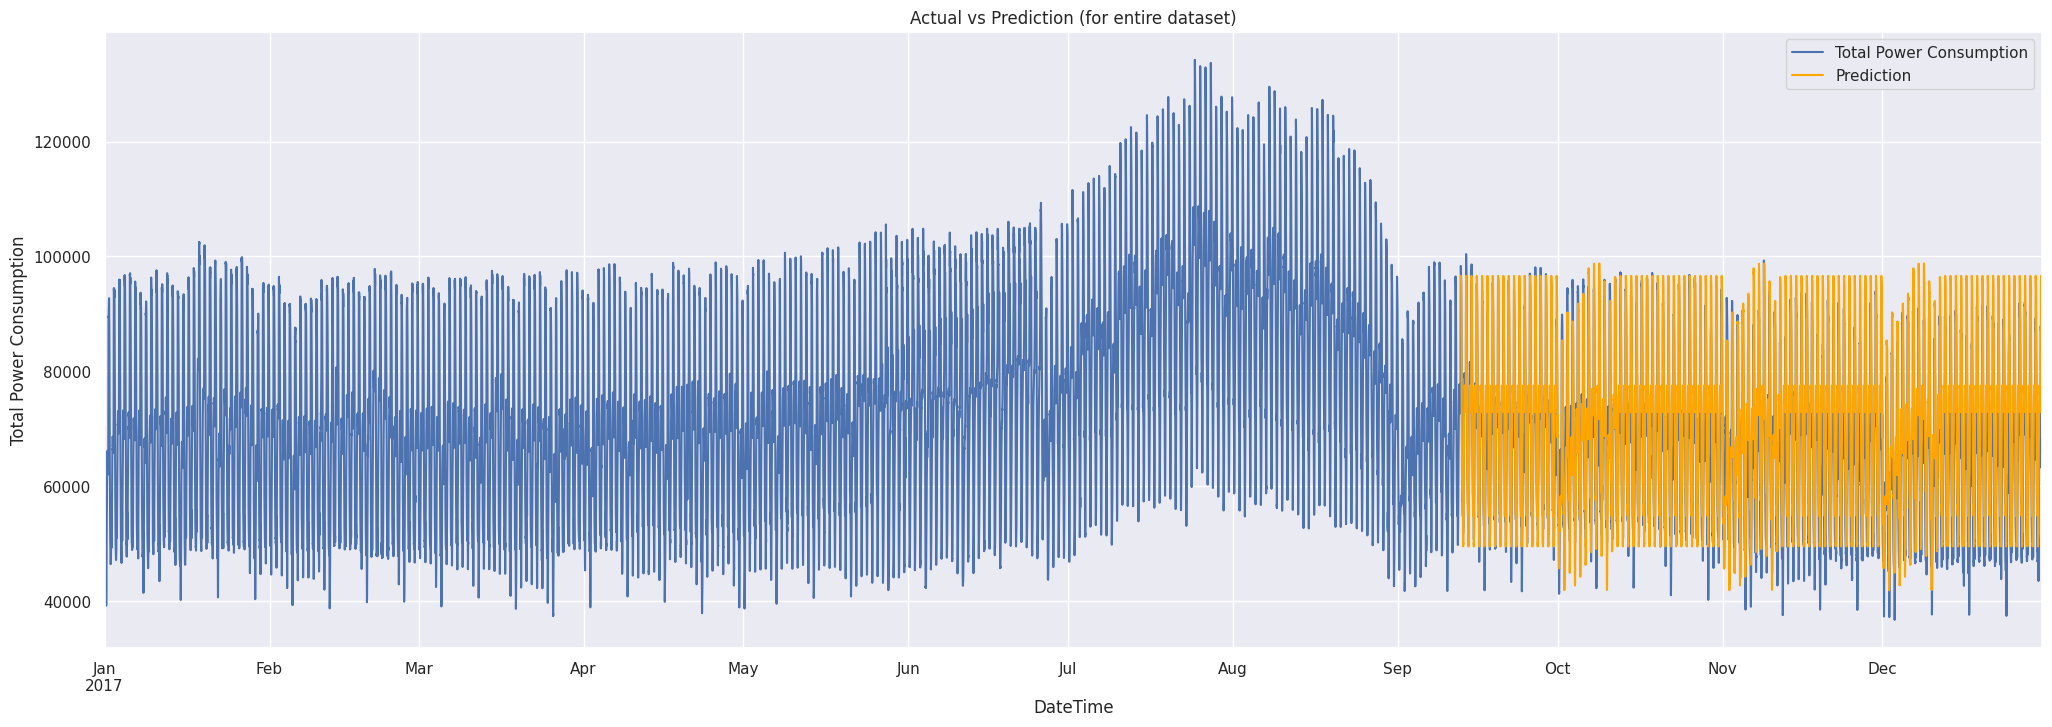

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
visualise_wholedata.plot(x='DateTime', y='Total Power Consumption', ax=ax)
visualise_wholedata.plot(x='DateTime', y='Prediction', ax=ax, color = 'orange')

ax.set_xlabel('DateTime')
ax.set_ylabel('Total Power Consumption')
ax.set_title('Actual vs Prediction (for entire dataset)')

plt.show()

In [ ]:
print('\nAccuracy Assessment for using Random Forest Regressor \n')
print('Explained Variance:\t{:.4f}'.format(explained_variance_score(y_test, y_pred)))
print('MSE value:\t\t{:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('RSME value:\t\t{:.4f}'.format(mean_squared_error(y_test, y_pred, squared = False)))
print('MAPE value:\t\t{:.4f}'.format(mean_absolute_percentage_error(y_test, y_pred)))


Accuracy Assessment for using Random Forest Regressor 

Explained Variance:	0.8049
MSE value:		52401243.7258
RSME value:		7238.8703
MAPE value:		0.0950
